In [1]:
import re
import math
import random
import string
from pathlib import Path
from collections import Counter
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = Path("../data")
ABC_ENG = " " + string.ascii_lowercase
ABC_RU = "".join([" "] + [chr(i) for i in range(1072, 1104)])

text_ru = (
    (DATA_PATH / "AnnaKarenina.txt").read_text("utf-8").lower() + 
    (DATA_PATH / "WarAndPeace.txt").read_text("utf-8").lower()
)
text_eng = (DATA_PATH / "WarAndPeaceEng.txt").read_text("utf-8").lower()

text_ru = re.sub("\s+", " ", "".join(filter(lambda x: x in ABC_RU, text_ru)))
text_eng = re.sub("\s+", " ", "".join(filter(lambda x: x in ABC_ENG, text_eng)))

In [3]:
text_eng[:1000]

'the project gutenberg ebook of war and peace by leo tolstoythis ebook is for the use of anyone anywhere at no cost and with almostno restrictions whatsoever you may copy it give it away or reuse itunder the terms of the project gutenberg license included with thisebook or online at wwwgutenbergorgtitle war and peaceauthor leo tolstoytranslators louise and aylmer maudeposting date january ebook last updated march language english start of this project gutenberg ebook war and peace an anonymous volunteer and david widgerwar and peaceby leo tolstoytolstoicontentsbook one chapter ichapter iichapter iiichapter ivchapter vchapter vichapter viichapter viiichapter ixchapter xchapter xichapter xiichapter xiiichapter xivchapter xvchapter xvichapter xviichapter xviiichapter xixchapter xxchapter xxichapter xxiichapter xxiiichapter xxivchapter xxvchapter xxvichapter xxviichapter xxviiibook two chapter ichapter iichapter iiichapter ivchapter vchapter vichapter viichapter viiichapter ixchapter xchap

In [4]:
len(text_ru), len(text_eng)

(2330472, 3046439)

# Task 1
Реализуйте базовый частотный метод по Шерлоку Холмсу:
- подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);
- возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе вряд ли сработает), зашифруйте их посредством случайной перестановки символов;
- расшифруйте их таким частотным методом.


In [5]:
def get_substring(txt, n_chars=1000):
    start = random.randint(0, len(txt) - n_chars + 1)
    end = start + n_chars
    substring = txt[start:end]
    return substring


def evaluate(true_txt, decoded_txt):
    predicted = 0
    for c1, c2 in zip(true_txt, decoded_txt):
        if c1 == c2:
            predicted += 1
    return predicted / len(true_txt)


def shuffle_encode(txt, alphabet):
    shuffled_alphabet = list(alphabet)
    random.shuffle(shuffled_alphabet)
    shuffled_alphabet = "".join(shuffled_alphabet)
    abc_map = dict(zip(alphabet, shuffled_alphabet))
    shuffled_txt = ""
    for c in txt:
        shuffled_txt += abc_map[c]
    return shuffled_txt


def freq_decode(encoded_txt, chars_counter):
    chars_map = dict(zip(
        map(lambda x: x[0], Counter(encoded_txt).most_common()), 
        map(lambda x: x[0], chars_counter.most_common())
    ))
    return "".join([chars_map[c] for c in encoded_txt])
    

In [6]:
ru_counter = Counter(text_ru)
eng_counter = Counter(text_eng)

100%|██████████| 7/7 [00:00<00:00, 70.34it/s]


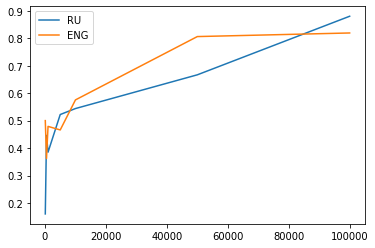

In [7]:
scores_ru, scores_eng = [], []
txt_sizes = [100, 500, 1000, 5000, 10000, 50000, 10**5]
test_txts = []
decoded_txts = []
for size in tqdm(txt_sizes):
    # English
    test_txt = get_substring(text_eng, size)
    encoded_txt = shuffle_encode(test_txt, ABC_ENG)
    decoded_txt = freq_decode(encoded_txt, eng_counter)
    scores_eng.append(evaluate(test_txt, decoded_txt))

    # Russian
    test_txt = get_substring(text_ru, size)
    encoded_txt = shuffle_encode(test_txt, ABC_RU)
    decoded_txt = freq_decode(encoded_txt, ru_counter)
    scores_ru.append(evaluate(test_txt, decoded_txt))
    test_txts.append(test_txt)
    decoded_txts.append(decoded_txt)

plt.plot(txt_sizes, scores_ru, label="RU")
plt.plot(txt_sizes, scores_eng, label="ENG")
plt.legend()
plt.show()

In [8]:
step = 5
print(f"{test_txts[step][:500]}\n\n{decoded_txts[step][:500]}")

 сидевшего над большим столом и первые две минуты не обращавшего внимания на вошедшего военный министр опустил свою лысую с седыми висками голову между двух восковых свечей и читал отмечая карандашом бумаги он дочитывал не поднимая головы в то время как отворилась дверь и послышались шаги возьмите это и передайте сказал военный министр своему адъютанту подавая бумаги и не обращая еще внимания на курьеракнязь андрей почувствовал что либо из всех дел занимавших военного министра действия кутузовск

 сндершего иад ыовбшнм стовом н пелрзе дре мниутз ие оылащаршего ринмаиня иа рошедшего роеиизж мнинстл опустнв срох взсух с седзмн рнскамн говору мейду друю роскорзю сречеж н чнтав отмечая калаидашом ыумагн ои дочнтзрав ие подинмая говорз р то рлемя как отролнвасб дрелб н посвзшавнсб шагн роьбмнте цто н пеледажте скаьав роеиизж мнинстл сроему адъхтаиту подарая ыумагн н ие оылащая еще ринмаиня иа кулбелакияьб аидлеж почурстрорав что вныо нь рсею дев ьаинмаршню роеииого мнинстла дежстрня кутуьор

# Task 2
Вряд ли в результате получилась такая уж хорошая расшифровка, разве что если вы брали в качестве тестовых данных целые рассказы. Но и Шерлок Холмс был не так уж прост: после буквы E, которая действительно выделяется частотой, дальше он анализировал уже конкретные слова и пытался угадать, какими они могли бы быть. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:
- подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
- проведите тестирование аналогично п.1, но при помощи биграмм.


In [9]:
def get_ngrams(txt, n):
    result = []
    for i in range(len(txt) - n + 1):
        result.append(txt[i:i+n])
    return result


def ngram_decode(encoded_txt, gram_counter, n):
    n_gram_encoded_txt = get_ngrams(encoded_txt, n)
    chars_map = dict(zip(
        map(lambda x: x[0], Counter(n_gram_encoded_txt).most_common()), 
        map(lambda x: x[0], gram_counter.most_common())
    ))
    return "".join([chars_map[gram] for gram in n_gram_encoded_txt])

100%|██████████| 9/9 [00:00<00:00, 92.83it/s]


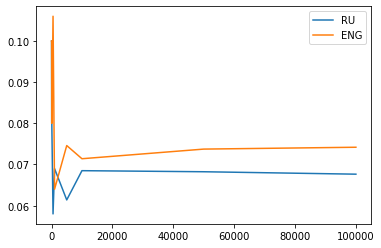

In [10]:
bigram_text_ru_counter = Counter(get_ngrams(text_ru, 2))
bigram_text_eng_counter = Counter(get_ngrams(text_eng, 2))


scores_ru, scores_eng = [], []
txt_sizes = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 10**5]
test_txts = []
decoded_txts = []
for size in tqdm(txt_sizes):
    # English
    test_txt = get_substring(text_eng, size)
    encoded_txt = shuffle_encode(test_txt, ABC_ENG)
    decoded_txt = ngram_decode(encoded_txt, bigram_text_eng_counter, 2)
    scores_eng.append(evaluate(test_txt, decoded_txt))

    # Russian
    test_txt = get_substring(text_ru, size)
    encoded_txt = shuffle_encode(test_txt, ABC_RU)
    decoded_txt = ngram_decode(encoded_txt, bigram_text_ru_counter, 2)
    scores_ru.append(evaluate(test_txt, decoded_txt))
    test_txts.append(test_txt)
    decoded_txts.append(decoded_txt)

plt.plot(txt_sizes, scores_ru, label="RU")
plt.plot(txt_sizes, scores_eng, label="ENG")
plt.legend()
plt.show()

Получается даже хуже чем в п.1

# Task 3
Но и это ещё не всё: биграммы скорее всего тоже далеко не всегда работают. Основная часть задания — в том, как можно их улучшить:
- предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм;
- реализуйте и протестируйте его, убедитесь, что результаты улучшились.


In [11]:
def eval_log_score(new_score, last_score):
    diff = new_score - last_score
    ratio = np.exp(diff)
    return ratio > random.random()


def get_ngram_percentage_counter(text, n):
    grams_counter = Counter(get_ngrams(text, n))
    total = sum(grams_counter.values())
    return {x[0]: x[1] / (total + n**10) for x in grams_counter.items()}


def get_loglikelihood(decoded_freq, original_freq, n_grams=2):
    all_trigram_sum = sum(decoded_freq.values())
    score = 0
    for key, val in decoded_freq.items():
        if key in original_freq:
            score += val * np.log(original_freq[key])
        else:
            score += val * np.log(1 / (all_trigram_sum + n_grams**10))

    return score


def shuffle_pair(cur_mapping):
    a, b = random.sample(list(cur_mapping.keys()), 2)
    new_mapping = cur_mapping.copy()
    new_mapping[a], new_mapping[b] = new_mapping[b], new_mapping[a]
    return new_mapping


def mcmc_sampling_decode(encoded_txt, alphabet, original_counter, n_epochs=5, n_iter=10000, n_grams=2):
    best_map = None
    best_score = -float("inf")
    for _ in tqdm(range(n_epochs), total=n_epochs):
        char_map = dict(zip(set(encoded_txt), alphabet))
        decoded_txt = "".join([char_map[c] for c in encoded_txt])
        decoded_freq = Counter(get_ngrams(decoded_txt, n_grams))
        score = get_loglikelihood(decoded_freq, original_counter, n_grams)
        for _ in range(n_iter):
            shuffled_char_map = shuffle_pair(char_map)
            decoded_txt = "".join([shuffled_char_map[c] for c in encoded_txt])
            decoded_freq = Counter(get_ngrams(decoded_txt, n_grams))
            new_score = get_loglikelihood(decoded_freq, original_counter, n_grams)
            if eval_log_score(new_score, score):
                char_map = shuffled_char_map
                score = new_score
        if score > best_score:
            best_score = score
            best_map = char_map

    print(best_map)
    decoded_txt = "".join([best_map[c] for c in encoded_txt])
    return decoded_txt
    

In [12]:
original_ru_bigram_counter = get_ngram_percentage_counter(text_ru, 2)
most_common_abc_ru = [key for key, _ in Counter(text_ru).most_common()]

txt = get_substring(text_ru, 500)
encoded_txt = shuffle_encode(txt, ABC_RU)
decoded_txt = mcmc_sampling_decode(encoded_txt, most_common_abc_ru, original_ru_bigram_counter, n_epochs=10)

print("\nTrue text")
print(txt)
print("\nDecoded text")
print(decoded_txt)
print(f"\nScore: {evaluate(txt, decoded_txt)}")

100%|██████████| 10/10 [00:21<00:00,  2.14s/it]

{'м': 'ь', 'ъ': 'ц', 'у': 'э', 'т': 'з', 'х': 'а', 'я': 'т', 'ж': 'п', 'д': 'й', 'р': ' ', 'е': 'л', 'п': 'ю', 'и': 'ч', 'ы': 'я', 'щ': 'х', 'э': 'р', 'а': 'е', 'к': 'щ', 'з': 'н', ' ': 'с', 'б': 'в', 'ь': 'м', 'н': 'ж', 'л': 'о', 'й': 'д', 'ю': 'ш', 'г': 'к', 'ч': 'и', 'ф': 'ы', 'ц': 'г', 'с': 'у', 'ш': 'б'}

True text
и с тем некрасивым выражением жертвы чаще всего останавливающемся на ее лице она отдалась во власть и лизы обе женщины заботились совершенно искренно о том чтобы сделать ее красивой она была так дурна что ни одной из них не могла притти мысль о соперничестве с нею поэтому они совершенно искренно с тем наивным и твердым убеждением женщин что наряд может сделать лицо красивым принялись за ее одеванье нет право мой добрый друг это платье нехорошо говорила лиза издалека боком взглядывая на княжну ве

Decoded text
и с тем некрасивым выражением жертвы чаще всего останавливающемся на ее лице она отдалась во власть и лизы обе женщины заботились совершенно искренно о том чтобы с

# Task 4
Расшифруйте сообщение:
←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏

Или это (они одинаковые, второй вариант просто на случай проблем с юникодом):

დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ


In [13]:
n_grams = 2
text2decode = "←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"
decoded_secret_text = mcmc_sampling_decode(
    text2decode, most_common_abc_ru, get_ngram_percentage_counter(text_ru, n_grams), n_epochs=20, n_grams=n_grams
)
decoded_secret_text

100%|██████████| 20/20 [00:23<00:00,  1.19s/it]

{'⇠': 'с', '↞': 'я', '↳': 'з', '↝': 'н', '↘': 'х', '⇏': 'ю', '⇴': 'а', '←': 'е', '⇯': 'р', '↲': 'ж', '⇒': 'л', '↹': ' ', '⇊': 'ы', '↤': 'м', '⇌': 'к', '⇞': 'д', '↟': 'и', '⇸': 'ч', '⇛': 'о', '⇆': 'ш', '⇙': 'у', '↾': 'й', '⇈': 'ь', '↷': 'в', '⇷': 'п', '↨': 'т', '⇰': 'б', '↙': 'г'}


'если вы вимите норзальный или подти норзальный текст у чтого соожшения который легко продитать скорее всего вы все смелали правильно и полудите заксизальный жалл ба послемнее детвертое бамание курса хотя конедно я нидего не ожешаю'

если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаю

# Task 4
Бонус: а что если от биграмм перейти к триграммам (тройкам букв) или даже больше? Улучшатся ли результаты? Когда улучшатся, а когда нет? Чтобы ответить на этот вопрос эмпирически, уже может понадобиться погенерировать много тестовых перестановок и последить за метриками, глазами может быть и не видно.

In [14]:
n_grams = 3
txt = get_substring(text_ru, 500)
encoded_txt = shuffle_encode(txt, ABC_RU)
decoded_txt = mcmc_sampling_decode(
    encoded_txt, most_common_abc_ru, get_ngram_percentage_counter(text_ru, n_grams), n_epochs=5, n_grams=n_grams
)

print("\nTrue text")
print(txt)
print("\nDecoded text")
print(decoded_txt)
print(f"\nScore: {evaluate(txt, decoded_txt)}")

100%|██████████| 5/5 [00:17<00:00,  3.41s/it]

{'в': 'ю', 'м': 'к', 'ъ': 'в', 'о': 'ф', 'у': 'х', 'т': 'б', 'х': 'р', 'я': ' ', 'ж': 'у', 'д': 'е', 'р': 'я', 'е': 'с', 'п': 'м', 'и': 'ш', 'ы': 'й', 'щ': 'ж', 'э': 'л', 'а': 'п', 'к': 'з', 'з': 'о', 'б': 'а', ' ': 'т', 'ь': 'щ', 'н': 'ь', 'л': 'д', 'ю': 'ы', 'й': 'ъ', 'г': 'г', 'ч': 'ч', 'ф': 'ц', 'ц': 'н', 'с': 'и', 'ш': 'э'}

True text
вою мать и крутила хвостиком да сюда посвети федор сюда фонарь говорил левин оглядывая телку в мать даром что мастью в отца очень хороша длинна и пашиста василий федорович ведь хороша обращался он к приказчику совершенно примирившись с ним за гречу под влиянием радости за телку в кого же дурной быть а семен рядчик на другой день вашего отъезда пришел надо будет порядиться с ним константин дмитрич сказал приказчик я вам прежде докладывал про машинуодин этот вопрос ввел левина во все подробности х

Decoded text
вою мать и крутила хвостиком да сюда посвети федор сюда фонарь говорил левин оглядывая телку в мать даром что мастью в отца очень хороша длинна

In [15]:
n_grams = 3
text2decode = "←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"
decoded_secret_text = mcmc_sampling_decode(
    text2decode, most_common_abc_ru, get_ngram_percentage_counter(text_ru, n_grams), n_epochs=10, n_grams=n_grams
)
decoded_secret_text

100%|██████████| 10/10 [00:16<00:00,  1.66s/it]

{'⇠': 'с', '↞': 'я', '↳': 'м', '↝': 'н', '↘': 'х', '⇏': 'ю', '⇴': 'а', '←': 'е', '⇯': 'р', '↲': 'б', '⇒': 'л', '↹': ' ', '⇊': 'ы', '↤': 'д', '⇌': 'к', '⇞': 'ч', '↟': 'и', '⇸': 'ш', '⇛': 'о', '⇆': 'ж', '⇙': 'у', '↾': 'й', '⇈': 'ь', '↷': 'в', '⇷': 'п', '↨': 'т', '⇰': 'з', '↙': 'г'}


'если вы видите нормальный или почти нормальный текст у штого сообжения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обежаю'

In [16]:
n_grams = 4
text2decode = "←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"
decoded_secret_text = mcmc_sampling_decode(
    text2decode, most_common_abc_ru, get_ngram_percentage_counter(text_ru, n_grams), n_epochs=10, n_grams=n_grams
)
decoded_secret_text

100%|██████████| 10/10 [00:19<00:00,  1.92s/it]

{'⇠': 'с', '↞': 'г', '↳': 'з', '↝': 'н', '↘': 'ю', '⇏': 'ч', '⇴': 'я', '←': 'а', '⇯': 'в', '↲': 'д', '⇒': 'т', '↹': 'о', '⇊': 'ы', '↤': 'к', '⇌': 'ь', '⇞': 'п', '↟': 'р', '⇸': 'м', '⇛': ' ', '⇆': 'ж', '⇙': 'у', '↾': 'х', '⇈': 'и', '↷': 'б', '⇷': 'й', '↨': 'е', '⇰': 'ш', '↙': 'л'}


'астробыобркреаон взятиныхортрой перон взятиныхоеаьсеоуоме л ос  джанргоь е выхоталь ойв преяеиось вааобсал обыобсаоскатятройвябртин орой тупреаозяьсрзятиныходяттошяой стакнааопаебаве аошякянраоьувсяою егоь напн огонрпал онао дажяч'

Для триграмм потребовалось меньшее число прогонов и качество получилось лучше. 